# **Black & Scholes model** 
The Black & Scholes model was developed to estimate the *fair* price of the European options. A European call option is a contract that allows the owner to buy a given stock at some future time $T$ at a fixed price $K$. If $S_T$ is the stock price at time $T$, then the payoff to the option buyer at time $T$ is:

 
$$
h(S_T)=(S_T - K)^+.
$$


Let $E_t$ be the option price at time $t$ , $0\leq t \leq T$. then it has to be

 $$
E_T=h(S_T).
$$ 


Let us assume there exist a function 

 
$$
f:[0,T]\times\mathbb{R}_+\rightarrow \mathbb{R}_+ 
$$


in $C^{1,2}((0,T)\times\mathbb{R}_+)$, such that for each $0\leq t \leq T $,


$$
E_t=f(t,S_t).
$$ 


Applying the Itô Formula to calculate the differential of $E_t$, we get:

 $$dE_t=\frac{\partial f}{\partial t}(t,S_t)dt
 + \frac{\partial f}{\partial S_t}(t,S_t)dS_t+ \frac{1}{2}\frac{\partial^2 f}{\partial S_t^2}(t,S_t)dS_t^2.$$


Given that $S_t$ satisfies:

 $$dS_t=\mu S_tdt + \sigma S_tdB_t,$$


the previus equation becomes:

$$dE_t = \left(\frac{\partial f}{\partial t}(t,S_t)+\mu S_t\frac{\partial f}{\partial x}(t,S_t) + \frac{\sigma^2}{2}S_t^2\frac{\partial^2 f}{\partial x^2}(t,S_t)\right)dt + \sigma S_t\frac{\partial f}{\partial x}(t,S_t)dB_t.$$

To provide another expression of $dE_t$, let's consider two investments:

*   a risky asset wich price at time $t$ is $S_t$, such that $S_0=cost$.
*   a risk-free asset wich price at time $t$ is $R_t$, such that $R_0=1$. 

The value of a portfolio composed of this two asset at time $t$ is:

 
$$V_t(X,Y) = X_tR_t + Y_tS_t$$


The non arbitrage condition of finantial market leads to the existence of a policy 


$$
\{(X_t,Y_t):0\leq t \leq T\},
$$ 


such that


$$
V_t(X,Y)= X_tR_t+Y_tS_t \quad \mbox{ and }\quad V_{t=T}(X,Y)=h(S_T).
$$ 

To be sure the option price is fair it must sutisfy the condition:

 
$$
V_t(X,Y) = E_t, ~~~0\leq t\leq T
$$ 


and because the policy is self-financing, we get another expression of $dE_t$:


$$
dE_t = X_tdR_t + Y_tdS_t
$$  
$$ 
= \left(rX_tR_t + \mu Y_tS_t\right)+\sigma Y_tS_tdB_t
$$

Identifing the two expressions of $dE_t$, a final-value socatic partial differential equation problem arise:

\begin{align*}
	&\left\{
		\begin{aligned}
  rf(t,S_t )=&\frac{\partial f}{\partial t}(t,S_t)+rS_t\frac{\partial f}{\partial x}(t,S_t)+\frac{\sigma^2}{2}S_t^2\frac{\partial^2 f}{\partial x^2}(t,S_t) \\
  \\
       f(T,S_T)=& h(S_T)	
		\end{aligned}
		\right.
\end{align*}

## **Feynman-Kac formula**

A key result to solve a partial stochastic differential equation is the *Feynman-Kac formula*. It estabishes a link between partial differential equation (PDE) and stocastic processes.

### Theorem (*Feynman-Kac formula*).
Let $u\in C^{1,2}_b ((0,T)\times \mathbb{R})$ be a solution to the following  PDE problem

\begin{align*}
	&\left\{
		\begin{aligned}
\frac{\partial u}{\partial t}(t,x)+\mu(t&,x)\frac{\partial u}{\partial x}(t,x)+\frac{1}{2}\sigma^2(t,x)\frac{\partial^2 u}{\partial x^2}(t,x)-\lambda(t,x) u(t,x) + k(t,x)=0 \\
\\
       u(T,x)= h(x)	
		\end{aligned}
		\right.
\end{align*}



where $\mu, \sigma, \lambda, k, h$ are known funtion and $T$ is a parameter. then the solution can be written as a conditional expectation


$$
u(t,x) = E^Q\left[\int_t^T e^{-\int_t^r \lambda(\tau,X_\tau)d\tau}k(r,X_r)dr + e^{-\int_t^T\lambda (\tau,X_\tau)d\tau}h(X_T)\bigg\vert X_t=x\right]
$$


under the probability measure $Q$ such that $X$ is an Ito process driven by the equation 


$$
dX_t = \mu (X_t)dt+\sigma(X_t)dB^Q_t
$$

with $B^Q_t$ the Brownian motion (Wiener process) under $Q$ and the initial condition $X_t=x$

Appling the *Feynman-Kac* formula  to the Black & Scholes model with:
 



*   $\mu(x)=rx$
*   $\sigma(x)=\sigma x$
*   $\lambda(x) = r$
*   $k=0$



we obtain a solution 



$$
f(t,x) = E^Q\left[e^{-r(T-t)}h(S_T)\bigg\vert S_t=x \right].
$$

Substituting the call European option Payoff


$$
h(S_T)=(S_T-K)^+
$$

the explicit expression of the solution becomes


\begin{equation}
f(t,S_t)=S_tN(d_1)-Ke^{r(T-t)}N(d_2)
\end{equation}

where $N(\cdot)$ is the cumulative distribution function of a normal random variable and

\begin{align*}
		\begin{aligned}
d_1 &= \frac{ln\frac{S_t}{K}+\left(r+\frac{1}{2}\sigma^2\right)\left(T-t\right)}{\sigma\sqrt{T-t}} \\
  \\
       d_2&=d_1-\sigma\sqrt{T-t}.
		\end{aligned}
\end{align*}

This expression gives us the fair price at time $t$ for an oprion that expires at time $T$ over an underling asset which price is described by $S_t$

# **Path-dependent Deep Galerkin Method (PDGM)**
To solve an even wider class of problem, namely the path-dependent terminal condition case (PPDE), a neural network architecture is presented. Since the functionals are non-anticipative, their value at time $t$ does not depend on state values after $t$, for any given $t$. Because of this characteristic the architecture is a combination of feed-forard and LSTM networks. 

## **Architecture**
Consider the PDE problem, here $\hat Y_t$ is a path of a stocastic process, i. e. $\hat Y_t = Y_t(\omega)$

\begin{align*}
	&\left\{
		\begin{aligned}
  \frac{\partial f}{\partial t}(\hat Y_t)+\mu(\hat Y_t)&\frac{\partial f}{\partial x}(\hat Y_t)+\frac{1}{2}\sigma^2(\hat Y_t)\frac{\partial^2 f}{\partial x^2}(\hat Y_t)-\lambda(\hat Y_t) f(\hat Y_t ) + k(\hat Y_t)=0 \\
  \\
       f(\hat Y_T)= h(\hat Y_T) 
		\end{aligned}
		\right.
\end{align*}

and a time discretization $\{t_i\}_{i=1,...,N}$ with $\delta t = t_i-t_{i-1}$, lower-case letter will denote spot-value of paths, i.e $y_s=\hat Y_{t=s}$, then approximate $f(y_t)$ by a feed-forward NN 





$$
f(y_t)\approx \tilde f(y_t;\theta) = \varphi(t_i,y_{t=t_i},a_{t_{i-1}};\theta^f), 
$$

where $t_i\leq t\leq t_{i+1}$ and $a_{t_{i-1}}$ is the output vector of a LSTM network, i.e. 

$$
a_{t_{i-1}}=\psi(t_0,...,t_{i-1},y_{t=t_0},...,y_{t=t_{i-1}};\theta^r),
$$

$\theta = \left[\theta^f,\theta^r\right]$ are the neural network parameters.

The functional derivatives for a function $f \in C^{1,2}$ can be approximated by the following expressions:


\begin{align*}
		\begin{aligned}
\Delta_t f(y_t) &= \frac{f(y_{t+\delta t})-f(y_t)}{\delta t} + o(\delta t) \\
\Delta_x f(y_t) &= \frac{f(y_t+h)-f(y_t)}{h} + o(h) \\
\Delta_{xx} f(y_t) &= \frac{f(y_t+h)-2f(y_t)+f(y_t-h)}{h^2} + o(h^2)
		\end{aligned}
\end{align*} 

    
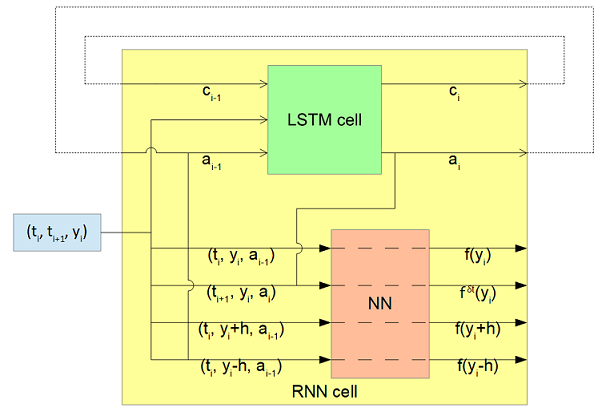

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import norm
import tensorflow as tf

import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, LSTM, Layer, RNN, Lambda, Input, Concatenate
from keras.optimizers import Adam
from keras.regularizers import L1L2

M = 128 # number of samples in a batch
T = 1 # terminal time
dt = 0.01 # detla_t
steps = int(T/dt) # number of time steps
r = 0.03
q = 0.01
sigma = 1
x_0 = 1.0 # X_0 
Strike = 0.4 #Strike Price
n_a = 64 # number of hidden neurons in the LSTM network

In [ ]:
lstm = LSTM(n_a,return_state = True)

# This feedforward neural network is used to compute the derivatives.
NN = Sequential([
   Dense(64, input_shape = (1+1+n_a,)),
   Activation('tanh'),
   Dense(32),
   Activation('tanh'),
   Dense(32),
   Activation('tanh'),
   Dense(1)
], name = 'NN')

In [ ]:
NN.summary()

Model: "NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4288      
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33       

In [ ]:
class PDGM_Cell(Layer):

  def __init__(self, units, states_size, lstm,  NN, **kwargs):
    
    super(PDGM_Cell, self).__init__(**kwargs)
    
    self.units = units
    self.states_size = states_size
    self.state_size = [states_size, states_size]
    
    self.LSTM_cell = lstm
    self.NN = NN
    

  def call(self, inputs, states):
    
    ## Approximate f(X_{t_0})
    input_x = tf.reshape(tf.slice(inputs,[0,2],[-1,1]), shape=(-1,1))
    input_t = tf.reshape(tf.slice(inputs,[0,0],[-1,1]), shape=(-1,1))
    a = tf.reshape(tf.slice(states,[0,0,0],[1,-1,-1]), shape=(-1, self.states_size))
    c = tf.reshape(tf.slice(states,[1,0,0],[1,-1,-1]), shape=(-1, self.states_size))
    inputt_f = tf.concat([input_x, input_t, a], 1)
    f = self.NN(inputt_f)

    ## calculate space derivatives
    bump = 0.01 * input_x
    input_x_up = input_x + bump
    input_x_down = input_x - bump
    inputt_up = tf.concat([input_x_up, input_t,a], 1)
    inputt_down = tf.concat([input_x_down, input_t,a], 1)
    f_up = self.NN(inputt_up)
    f_down = self.NN(inputt_down)
    partial_x_f = (f_up - f)/bump
    partial_xx_f = (f_up - 2 * f + f_down)/bump/bump

    ## update states 
    input_reshape = tf.reshape(tf.concat([input_x, input_t],1), shape=(-1,1,2))
    a,_,c = self.LSTM_cell(input_reshape, initial_state = [a,c])

    ## calculate time derivative
    input_t_time = tf.reshape(tf.slice(inputs,[0,1],[-1,1]), shape=(-1,1))
    inputt_time = tf.concat([input_x, input_t_time, a],1)
    f_flat = self.NN(inputt_time)
    partial_t_f = (f_flat - f)/(input_t_time-input_t)

    output = tf.concat([ f, partial_t_f, partial_x_f, partial_xx_f],1)
    states = [a,c]
    return output, states

In [ ]:
cell = PDGM_Cell(4, n_a, lstm, NN, name = 'PDGM_cell')
inputs = Input(shape = (steps+1,3))
outputs = RNN(cell, name = 'Loop', return_sequences = True)(inputs)

PDGM_model = Model(inputs = inputs, outputs = outputs, name = 'pdgm_model')


In [ ]:
PDGM_model.summary()

Model: "pdgm_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 101, 3)]          0         
_________________________________________________________________
Loop (RNN)                   (None, 101, 4)            24609     
Total params: 24,609
Trainable params: 24,609
Non-trainable params: 0
_________________________________________________________________


## **Loss function**
The general final-value PPDE problem can be written in the form:

\begin{align*}
	&\left\{
		\begin{aligned}
  \frac{\partial f}{\partial t}(\hat Y_t)+ \mathcal{L} f(&\hat Y_t)=0 \\
       f(\hat Y_T)= h(\hat Y_T&) 
		\end{aligned}
		\right.
\end{align*}

where $\hat Y_t$ is a path in $0\leq t\leq T$, and $\mathcal{L}$ is the linear operator given by:

$$\mathcal{L}f(\hat Y_t)=\mu(\hat Y_t)\frac{\partial f}{\partial x}(\hat Y_t)+\frac{1}{2}\sigma^2(\hat Y_t)\frac{\partial^2 f}{\partial x^2}(\hat Y_t)-\lambda(\hat Y_t) f(\hat Y_t ) + k(\hat Y_t)$$

so the neural network is trained to minimize the following loss function:
 

$$J(\theta)=\left|\left| \Delta_t^{\delta t}u(\> \cdot \> ;\theta)+\mathcal{L}^hu(\> \cdot \> ;\theta) 
\right|\right| ^2+ 
\left|\left| u( \> \cdot \> ;\theta)-h
\right|\right|^2
$$

Given the previusly seen expression for functional derivatives approximations, we have:

\begin{align*}
		\begin{aligned}
u( Y_{t_i}^{(j)};\theta) &= \varphi(t_i,y_{t_i}^{(j)},a_{t_{i-1}};\theta^f),\\
u( Y_{t_i,\delta t}^{(j)};\theta) &= \varphi(t_{i+1},y_{t_{i+1}}^{(j)},a_{t_i-};\theta^f),\\
\Delta_t^hu( Y_{t_i}^{(j)};\theta) &= \frac{u( Y_{t_i+\delta t}^{(j)};\theta)-u( Y_{t_i}^{(j)};\theta)}{\delta t} \\
\Delta_x^h u( Y_{t_i}^{(j)};\theta) &= \frac{u( Y_{t_i}^{(j)};\theta)-u( Y_{t_i}^{(j)}+h;\theta)}{h}\\
\Delta_{xx}^h u( Y_{t_i}^{(j)};\theta) &= \frac{u( Y_{t_i}^{(j)}+h;\theta)-2u( Y_{t_i}^{(j)};\theta)+u( Y_{t_i}^{(j)}-h;\theta)}{h^2}
		\end{aligned}
\end{align*}


so, given $M$ simulated paths, time and space discretization parameters $\delta t$ and $h$ the loss will be approximated by 



$$
J_{NM}(\theta) = \frac{1}{NM} \sum_{i=1}^N\sum_{j=0}^M \left(\Delta_t ^{\delta t}u(Y_{t_i}^{(j)};\theta)+\mathcal{L}^hu(Y_{t_i}^{(j)};\theta)\right)^2\\
+\frac{1}{M}\sum_{j=0}^M\left(u(Y^{(j)}_{t_N};\theta)-h(Y^{(j)}_{t_N})\right)^2
$$


where


$$
\mathcal{L}^hu(Y_{t_i}^{(j)};\theta) = rY^{(j)}_{t_i}\Delta_x^hu(Y_{t_i}^{(j)};\theta)+ \frac{\sigma^2}{2}{Y^{(j)}_{t_i}}^2\Delta_{xx}^hu(Y_{t_i}^{(j)};\theta)-ru(Y^{(j)}_{t_i};\theta)
$$

In [ ]:
def loss_function(y_true, y_predicted):

  input_t = tf.reshape(tf.slice(y_true,[0,0,0],[M,steps+1,1]), shape=(M,-1))
  input_x = tf.reshape(tf.slice(y_true,[0,0,2],[M,steps+1,1]), shape=(M,-1))

  f = tf.reshape(tf.slice(y_predicted,[0,0,0],[M,steps+1,1]), shape=(M,-1))
  partial_t_f = tf.reshape(tf.slice(y_predicted,[0,0,1],[M,steps+1,1]), shape=(M,-1))
  partial_x_f = tf.reshape(tf.slice(y_predicted,[0,0,2],[M,steps+1,1]), shape=(M,-1))
  partial_xx_f = tf.reshape(tf.slice(y_predicted,[0,0,3],[M,steps+1,1]), shape=(M,-1))

  S_dxf = tf.math.multiply(input_x, partial_x_f)
  S2_dxxf = tf.math.multiply(tf.square(input_x), partial_xx_f)

  Loss = tf.reduce_mean(tf.square(partial_t_f + r * S_dxf + sigma**2 / 2 * S2_dxxf - r * f))

  #marginal cost
  x_T = tf.slice(input_x,[0,input_x.get_shape()[1]-1],[M,1])
  f_T = tf.slice(f,[0,input_x.get_shape()[1]-1],[M,1])
  Loss = Loss + tf.reduce_mean( tf.square( f_T - tf.maximum(tf.zeros(shape=(M,1)),x_T-Strike)))
  
  return Loss

## Path generation
A key ingredient of the metod above is the siulation of the paths $Y^{(j)}$. However, the path generation does not need to be as pricise as in the classical Monte Carlo method because the PDE we are trying to solve, therfore the model, alredy contains the dynamic of the underling stochastic prosses $Y_t$.
Here the paths are sampled from the Geometric Brownian motion, which is the the dynamic used in the Black & Scholes model
   

$$
Y_t=Y_0e^{\left(\mu-\frac{\sigma^2}{2}\right)t+\sigma B_t}
$$

where $B_t$ is the classic Brownian motion.
$Y_t$ solves the diffetential equation:

$$
dY_t = \mu Y_tdt+\sigma Y_tdB_t
$$ 

In [ ]:
def generate_t(T, steps, M = M):

  t_temp = np.linspace(1e-6, T- 1e-6, steps +1, dtype = np.float32)

  return np.tile(np.concatenate((t_temp, [T + dt])), (M,1)) # extra after terminal

t = generate_t(T, steps)[0][0:-1]

In [ ]:
def Create_paths(i, M):
   
  # generate time steps for each path
  np.random.seed(i)
  x = np.tile(x_0, (M, 1))
  path = np.tile(x_0, (M, 1))
  delta = T/1000
   
  dW = np.sqrt(delta)*np.random.normal(size=(M, 1000))
  for k in range(1000):
    x += (r-q) * x * delta + sigma * x * dW[:,k:k+1]
    path = np.concatenate((path, x), axis = 1)
       
  #  select # of steps from total 1000 timesteps
  selection = np.linspace(0,1000, steps+1, dtype = np.int) 
  path = np.array(path, dtype=np.float32)
  path_selection = path[:,selection]
  return np.array(path_selection, dtype=np.float32)


Text(0.5, 0, 'Time')

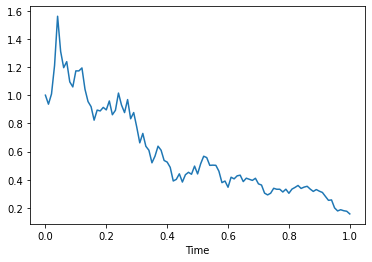

In [ ]:
paths = Create_paths(100000000, M)
for i in range(1):
  plt.plot(t, paths[i])
#plt.title("16 samples paths")
plt.xlabel("Time")

compute true solution   $ C_t $ and terminal condition $C_T$

In [ ]:
def true_solution(apath):

  d_1 = 1/sigma/np.sqrt(T - t[0]) * (np.log(apath[0] / Strike) + (T - t[0]) * (r + sigma ** 2 / 2))
  d_2 = d_1 - sigma * np.sqrt(T - t[0])
  true_solution = [apath[0] * norm.cdf(d_1) - Strike * np.exp(-r*(T - t[0])) * norm.cdf(d_2)]
   
  for k in range(1, steps+1):
    d_1 = 1/sigma/np.sqrt(T - t[k]) * (np.log(apath[k] / Strike) + (T - t[k]) * (r + sigma ** 2 / 2))
    d_2 = d_1 - sigma * np.sqrt(T - t[k])
    true_solution.append(apath[k] * norm.cdf(d_1) - Strike * np.exp(-r*(T - t[k])) * norm.cdf(d_2))
  return true_solution

#terminal condition
def terminal_condition(apath):

  return max(0,apath[steps]-Strike) 


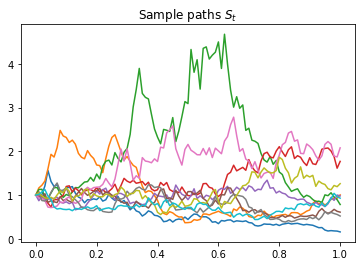

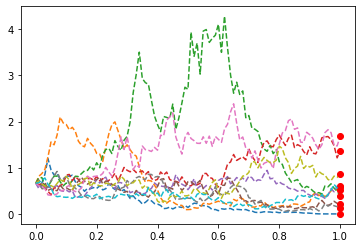

In [ ]:
for i in range(10):
  plt.plot(t, paths[i])
plt.title("Sample paths $S_t$")
plt.show()

for i in range(10):
  plt.plot(t, true_solution(paths[i]), '--')
  plt.plot(T, terminal_condition(paths[i]), "ro")
#plt.title("corresponding true solution $C(S_t)$")
plt.show()

## Training

In [ ]:
initial_learning_rate = 0.01

learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, 100, 0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate , clipnorm = 0.5)

In [ ]:
path_test = Create_paths(100000000, M).reshape((M,-1,1))
time = generate_t(T, steps, M)
 
time_p0 = time[:,:-1].reshape((M,-1,1))
time_p1 = time[:,1 :].reshape((M,-1,1))
input_test = np.concatenate((time_p0,time_p1,path_test), axis=2)

PDGM_model.compile(
    optimizer = optimizer,
    loss = loss_function
)


Epoch 1/5
100/100 [==============================] - 26s 214ms/step - loss: 0.9019 - val_loss: 0.0179
Epoch 2/5
100/100 [==============================] - 20s 201ms/step - loss: 0.0709 - val_loss: 0.0209
Epoch 3/5
100/100 [==============================] - 20s 202ms/step - loss: 0.0654 - val_loss: 0.0093
Epoch 4/5
100/100 [==============================] - 20s 199ms/step - loss: 0.0537 - val_loss: 0.0065
Epoch 5/5
100/100 [==============================] - 20s 201ms/step - loss: 0.0538 - val_loss: 0.0035


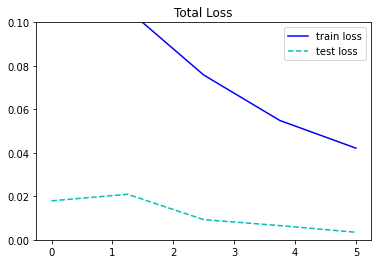

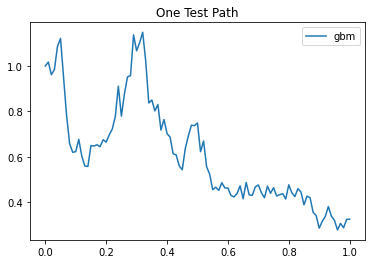

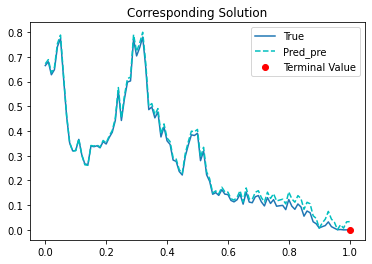

Epoch 1/5
100/100 [==============================] - 20s 201ms/step - loss: 0.0346 - val_loss: 0.0096
Epoch 2/5
100/100 [==============================] - 20s 205ms/step - loss: 0.0283 - val_loss: 0.0029
Epoch 3/5
100/100 [==============================] - 20s 199ms/step - loss: 0.0210 - val_loss: 0.0025
Epoch 4/5
100/100 [==============================] - 20s 200ms/step - loss: 0.0158 - val_loss: 0.0028
Epoch 5/5
100/100 [==============================] - 20s 203ms/step - loss: 0.0165 - val_loss: 0.0077


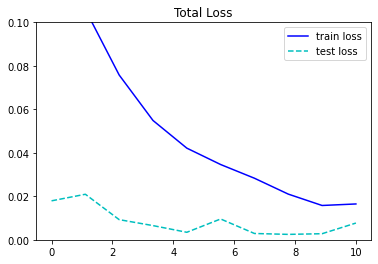

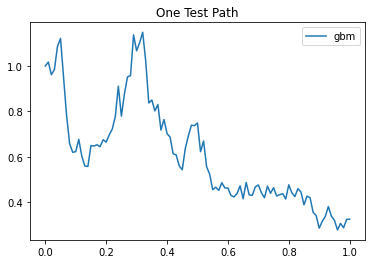

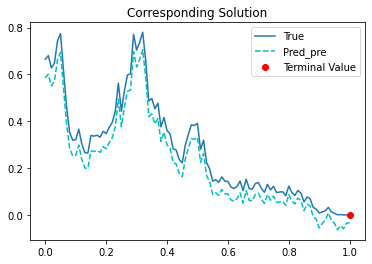

Epoch 1/5
100/100 [==============================] - 20s 203ms/step - loss: 0.0200 - val_loss: 0.0084
Epoch 2/5
100/100 [==============================] - 20s 202ms/step - loss: 0.0137 - val_loss: 0.0048
Epoch 3/5
100/100 [==============================] - 20s 203ms/step - loss: 0.0136 - val_loss: 0.0019
Epoch 4/5
100/100 [==============================] - 20s 202ms/step - loss: 0.0113 - val_loss: 0.0032
Epoch 5/5
100/100 [==============================] - 20s 204ms/step - loss: 0.0109 - val_loss: 0.0018


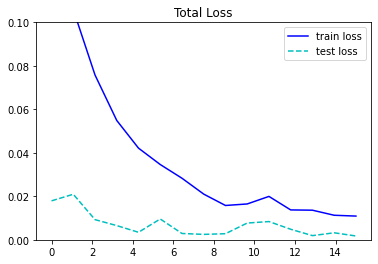

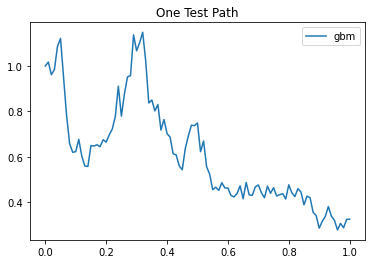

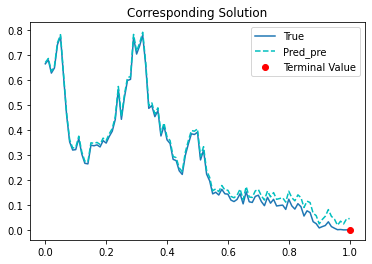

Epoch 1/5
100/100 [==============================] - 20s 205ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 2/5
100/100 [==============================] - 20s 202ms/step - loss: 0.0089 - val_loss: 0.0018
Epoch 3/5
100/100 [==============================] - 20s 203ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 4/5
100/100 [==============================] - 20s 204ms/step - loss: 0.0066 - val_loss: 0.0011
Epoch 5/5
100/100 [==============================] - 20s 199ms/step - loss: 0.0059 - val_loss: 0.0022


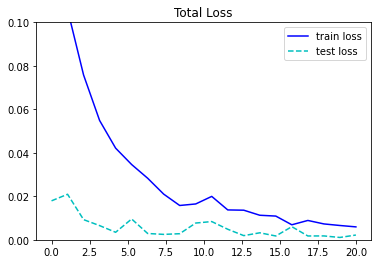

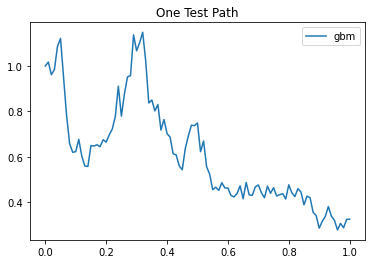

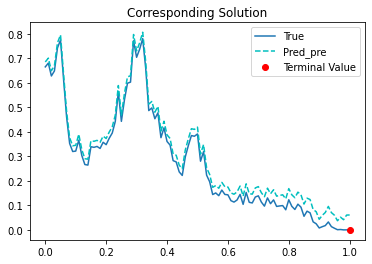

Epoch 1/5
100/100 [==============================] - 20s 205ms/step - loss: 0.0049 - val_loss: 0.0016
Epoch 2/5
100/100 [==============================] - 21s 205ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 3/5
100/100 [==============================] - 21s 205ms/step - loss: 0.0056 - val_loss: 0.0011
Epoch 4/5
100/100 [==============================] - 20s 200ms/step - loss: 0.0047 - val_loss: 8.2981e-04
Epoch 5/5
100/100 [==============================] - 20s 203ms/step - loss: 0.0040 - val_loss: 7.4032e-04


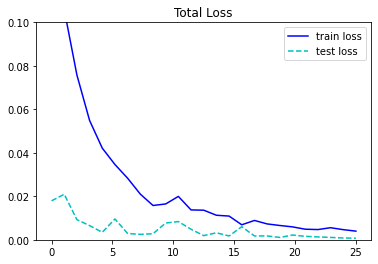

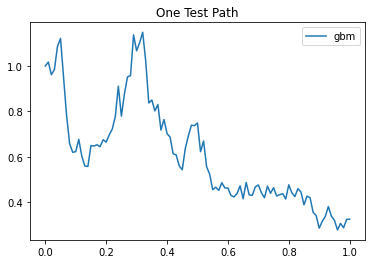

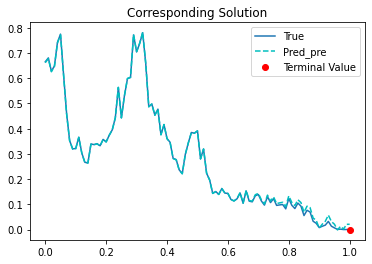

Epoch 1/5
100/100 [==============================] - 21s 205ms/step - loss: 0.0034 - val_loss: 6.7295e-04
Epoch 2/5
100/100 [==============================] - 21s 207ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 3/5
100/100 [==============================] - 20s 204ms/step - loss: 0.0032 - val_loss: 9.8290e-04
Epoch 4/5
100/100 [==============================] - 21s 208ms/step - loss: 0.0033 - val_loss: 6.2927e-04
Epoch 5/5
100/100 [==============================] - 21s 206ms/step - loss: 0.0030 - val_loss: 9.2870e-04


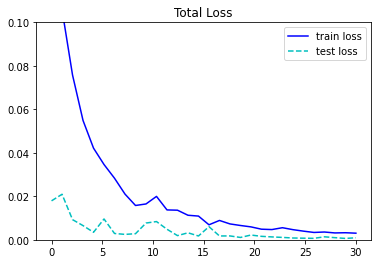

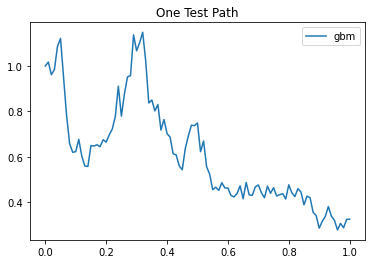

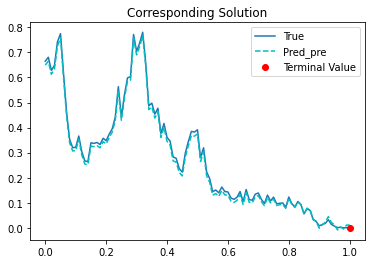

Epoch 1/5
100/100 [==============================] - 21s 210ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 2/5
100/100 [==============================] - 21s 206ms/step - loss: 0.0035 - val_loss: 5.8443e-04
Epoch 3/5
100/100 [==============================] - 21s 207ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 4/5
100/100 [==============================] - 21s 205ms/step - loss: 0.0029 - val_loss: 5.3219e-04
Epoch 5/5
100/100 [==============================] - 21s 207ms/step - loss: 0.0025 - val_loss: 5.7753e-04


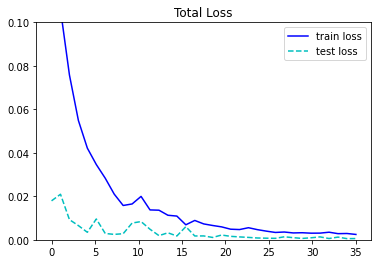

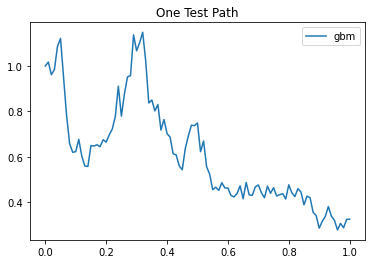

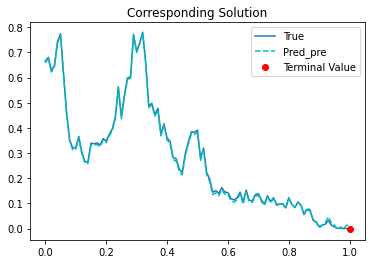

Epoch 1/5
100/100 [==============================] - 21s 206ms/step - loss: 0.0025 - val_loss: 9.1418e-04
Epoch 2/5
100/100 [==============================] - 20s 203ms/step - loss: 0.0024 - val_loss: 5.3608e-04
Epoch 3/5
100/100 [==============================] - 21s 206ms/step - loss: 0.0022 - val_loss: 5.4827e-04
Epoch 4/5
100/100 [==============================] - 21s 206ms/step - loss: 0.0023 - val_loss: 6.5201e-04
Epoch 5/5
100/100 [==============================] - 21s 206ms/step - loss: 0.0023 - val_loss: 5.5448e-04


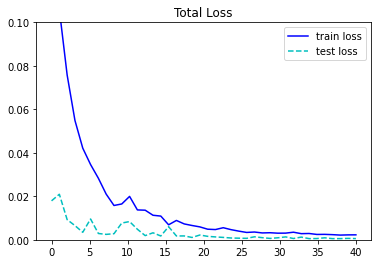

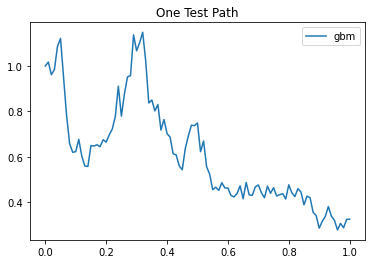

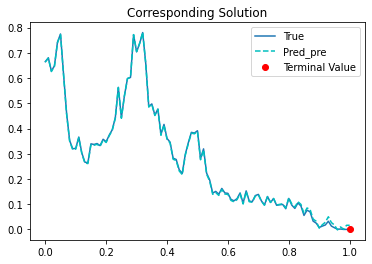

Epoch 1/5
100/100 [==============================] - 21s 209ms/step - loss: 0.0021 - val_loss: 4.9722e-04
Epoch 2/5
100/100 [==============================] - 21s 207ms/step - loss: 0.0021 - val_loss: 5.1528e-04
Epoch 3/5
100/100 [==============================] - 21s 208ms/step - loss: 0.0021 - val_loss: 5.2499e-04
Epoch 4/5
100/100 [==============================] - 21s 207ms/step - loss: 0.0020 - val_loss: 5.0083e-04
Epoch 5/5
100/100 [==============================] - 20s 205ms/step - loss: 0.0020 - val_loss: 4.9859e-04


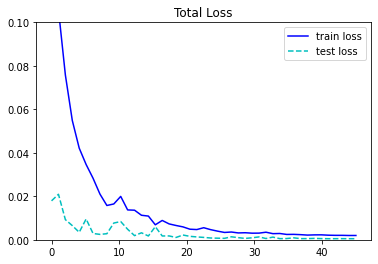

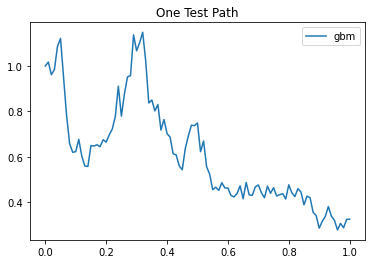

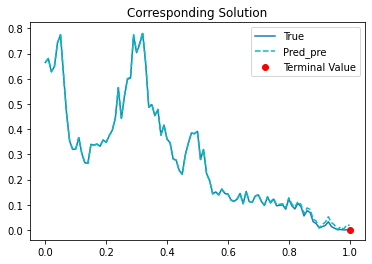

Epoch 1/5
100/100 [==============================] - 21s 210ms/step - loss: 0.0020 - val_loss: 4.8270e-04
Epoch 2/5
100/100 [==============================] - 21s 205ms/step - loss: 0.0019 - val_loss: 4.9022e-04
Epoch 3/5
100/100 [==============================] - 21s 209ms/step - loss: 0.0019 - val_loss: 5.1283e-04
Epoch 4/5
100/100 [==============================] - 21s 211ms/step - loss: 0.0018 - val_loss: 5.1974e-04
Epoch 5/5
100/100 [==============================] - 21s 210ms/step - loss: 0.0018 - val_loss: 4.8291e-04


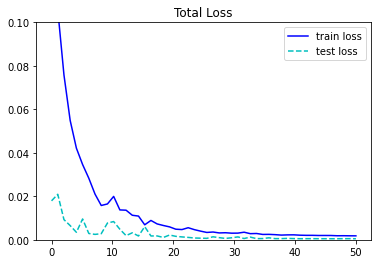

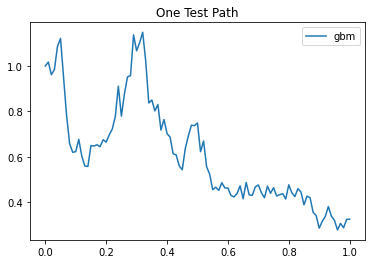

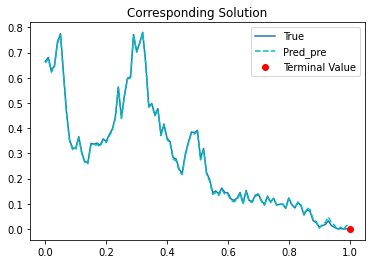

In [ ]:
train_loss_list = []
test_loss_list = []
epochs = 50
steps_per_epoch = 100

#generate the train data
path_train = Create_paths(1, M*steps_per_epoch).reshape((M*steps_per_epoch,-1,1))
time = generate_t(T, steps, M*steps_per_epoch)
time_p0 = time[:,:-1].reshape((M*steps_per_epoch,-1,1))
time_p1 = time[:,1 :].reshape((M*steps_per_epoch,-1,1))
input_train = np.concatenate((time_p0, time_p1, path_train), axis=2)

for it in range(int(epochs/5)):
  history = PDGM_model.fit(input_train, input_train, M, 5, validation_data=(input_test, input_test))
  for i in range(5):
    train_loss_list.append(history.history['loss'][i])
    test_loss_list.append(history.history['val_loss'][i])
  
  #print the loss history, a path, and the corrisponding solution
  to_print = 54
  num_epochs = len(train_loss_list)
  x_axis_epoches = np.linspace(0, num_epochs, num_epochs) 
  plt.plot(x_axis_epoches, train_loss_list, 'b-', label = "train loss")
  plt.plot(x_axis_epoches, test_loss_list, 'c--', label = "test loss")
  plt.legend()
  plt.ylim([0, 0.1])
  plt.title("Total Loss")
  plt.show()

  plt.plot(t, path_test[to_print], label = "gbm")
  plt.legend()
  plt.title("One Test Path")
  plt.show()

  prediction = PDGM_model(input_test)
  plt.plot(t, true_solution(path_test[to_print]), label = "True")
  plt.plot(t, prediction[to_print,:,0], 'c--', label = "Pred_pre")
  plt.plot(T, terminal_condition(path_test[to_print]), "ro", label = "Terminal Value")
  plt.legend()
  plt.title("Corresponding Solution")
  plt.show()
  

## testing

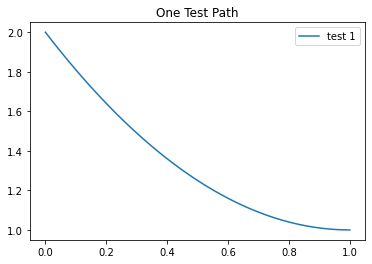

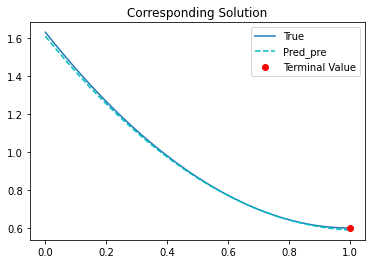

In [ ]:
path_test2 = np.tile(np.linspace(1,1e-6, steps+1)**2+1, (M,1)).reshape((M,-1,1))
time = generate_t(T, steps, M)
time_p0 = time[:,:-1].reshape((M,-1,1))
time_p1 = time[:,1 :].reshape((M,-1,1))
input_test2 = np.concatenate((time_p0, time_p1, path_test2), axis=2)

plt.plot(t, path_test2[0], label = "test 1")
plt.legend()
plt.title("One Test Path")
plt.show()

prediction = PDGM_model(input_test2)
plt.plot(t, true_solution(path_test2[0]), label = "True")
plt.plot(t, prediction[0,:,0], 'c--', label = "Pred_pre")
plt.plot(T, terminal_condition(path_test2[0]), "ro", label = "Terminal Value")
plt.legend()
plt.title("Corresponding Solution")
plt.show()

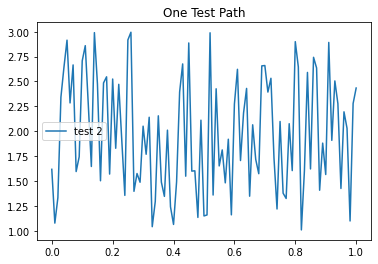

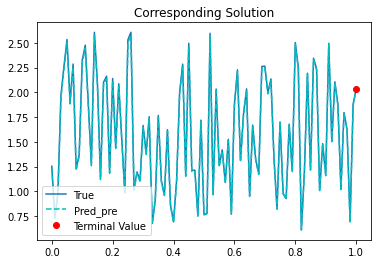

In [ ]:
path_test3 = np.tile(np.random.uniform(1, 3, steps+1), (M,1)).reshape((M,-1,1))
time = generate_t(T, steps, M)
time_p0 = time[:,:-1].reshape((M,-1,1))
time_p1 = time[:,1 :].reshape((M,-1,1))
input_test3 = np.concatenate((time_p0, time_p1, path_test3), axis=2)

plt.plot(t, path_test3[0], label = "test 2")
plt.legend()
plt.title("One Test Path")
plt.show()

prediction = PDGM_model(input_test3)
plt.plot(t, true_solution(path_test3[0]), label = "True")
plt.plot(t, prediction[0,:,0], 'c--', label = "Pred_pre")
plt.plot(T, terminal_condition(path_test3[0]), "ro", label = "Terminal Value")
plt.legend()
plt.title("Corresponding Solution")
plt.show()

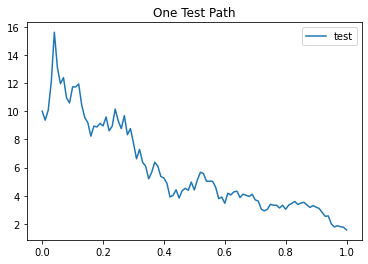

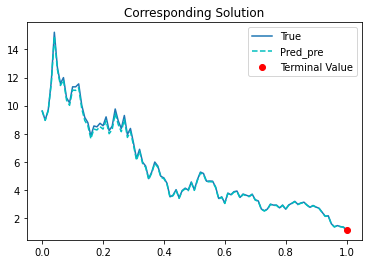

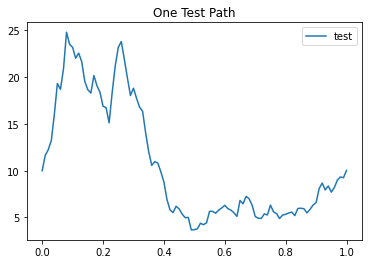

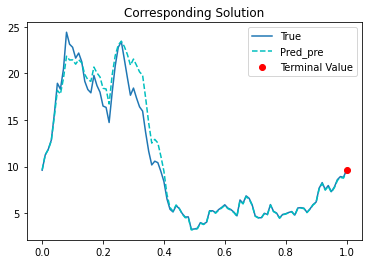

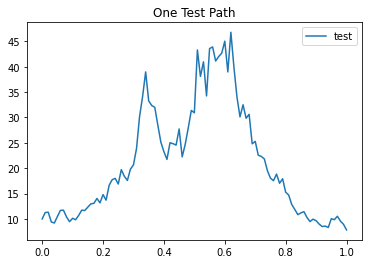

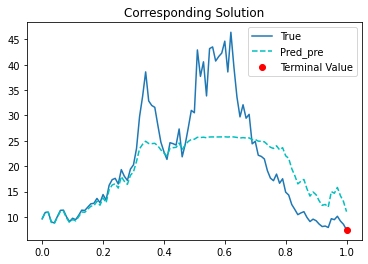

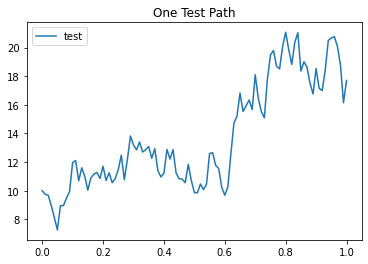

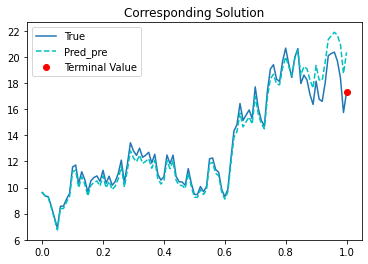

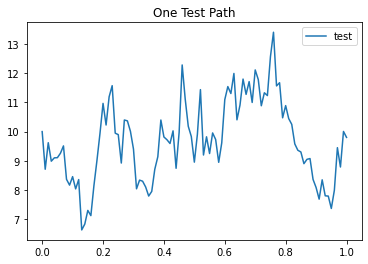

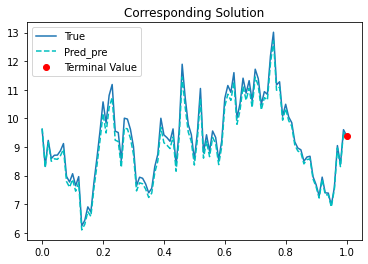

In [ ]:
tests = 5

path_test4 = 10*paths.reshape((M,-1,1))
time = generate_t(T, steps, M)
time_p0 = time[:,:-1].reshape((M,-1,1))
time_p1 = time[:,1 :].reshape((M,-1,1))
input_test4 = np.concatenate((time_p0, time_p1, path_test4), axis=2)
prediction = PDGM_model(input_test4)

for i in range(tests):
  plt.plot(t, path_test4[i], label = "test")
  plt.legend()  
  plt.title("One Test Path")
  plt.show()

  plt.plot(t, true_solution(path_test4[i]), label = "True")
  plt.plot(t, prediction[i,:,0], 'c--', label = "Pred_pre")
  plt.plot(T, terminal_condition(path_test4[i]), "ro", label = "Terminal Value")
  plt.legend()
  plt.title("Corresponding Solution")
  plt.show()